# Level spacing of kicked top

1) ## Level spacing for single kicked top

$H=\alpha J_y +\frac{\hslash k}{2j}J_z^2\sum_{n=-\infty}^{\infty}\delta(t-n\tau)$

Where $\large{\alpha = \frac{\hslash p}{\tau}}$ from Haake paper on Kicked top.

$U = exp(-i\frac{k}{2j}J_{z}^2)\cdot exp(-ip J_{y})$

Link: [Classical and quantum chaos for a kicked top by Haake](https://link.springer.com/article/10.1007/BF01303727)

Drive link: [F Haake Classical and Quantum Chaos for a Kicked top.pdf](https://drive.google.com/file/d/1inHX4e8KOc9bSNvuQqZrA7Ikxzizlyd0/view?usp=sharing)

### Numerical result version 1.0

In [1]:
using QuantumOptics
import PyPlot as plt
using SparseArrays
using LinearAlgebra
using Plots
using Statistics

In [2]:
# Finding the level spacing dynamics of the floquet map for kicked top.

#------------------------------------------------
# Parameters
k1 = 10.3;
j1 = 500
p = 1.40
ϵpow=15; ϵ = 10.0^(-ϵpow) #precision
#------------------------------------------------
# Basis
b1 = SpinBasis(j1)

# Operator creation
Jy1 = 0.5*sigmay(b1)
Jz1 = 0.5*sigmaz(b1)

# Floquet operator
# U1 for j=j1
U1 = exp(dense(-1im*k1*(Jz1*Jz1)/(2*j1)))*exp(dense(-1im*p*Jy1));
#U1.data[abs.(U1.data) .< ϵ] .= 0 # If matrix element is bellow ϵ;
#U1=sparse(U1) # making it sparse matrix.

# do not seperate the region bellow >>>
"""
eigv_U1 = eigd_U1[1] # odd-even eigenvalues. It is not making a new array give a name to the arrry of
eigd_U1 1st part.  after deleting the element in eigv_U1. It delete the same elements of eigd_U1[1].
""";
#------------------------------------------------------
# finding the eigendecomposition of U1
eigd_U1 = eigenstates(U1,2*j1+1, warning = false);#decomposition of U1, eigenvalue with eigen vector.

#parity check operator.
Ry = exp(dense(-im*π*Jy1))
P_even = (1/2)*(Ry + identityoperator(b1))
        
# parity check return 1 means even, 0 means odd parity.
function pcheck(vect)
    a = dagger(vect)*P_even*vect
    return round(a,digits = 12)
end

# filtering the even parity eigenvalue.
eigv_U1 = eigd_U1[1] # odd-even eigenvalues.
indices = findall(x -> pcheck(x) == 0, eigd_U1[2]) # finding the index with odd parity.

deleteat!(eigv_U1, indices) # deleting the eigenvalue with odd parity.
#------------------------------------------------------<<<


eigv_angles_U1 = angle.(eigv_U1)# find angels in of the eigenvalues.
sorted_eigv_angles_U1 = sort(eigv_angles_U1)# sort the angles in ascending order.

# calculate the level spacing by taking the difference between adjacent angles.
spacings_U1 = 1diff(sorted_eigv_angles_U1);
spacings_U1 = (1/mean(spacings_U1))*spacings_U1; # normalizing the level spacing.

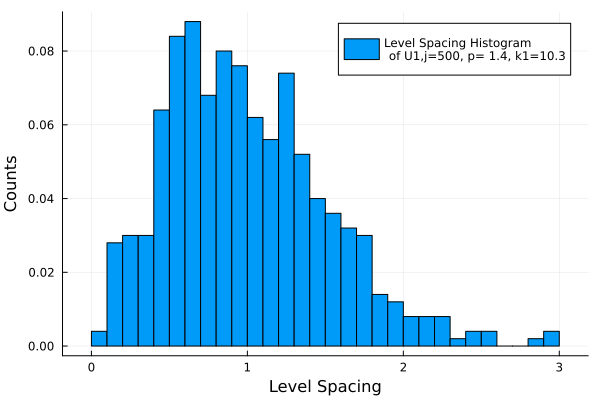

In [3]:
# Plot a histogram of the level spacing.
histogram(spacings_U1,bins=50,xlabel="Level Spacing",normalize=:probability,ylabel="Counts",label="Level Spacing Histogram\n of U1,j=$j1, p= $(round(p,digits = 3)), k1=$k1")


### Numerical result version 2.0

#### Difference between version 1.0 and version 2.0

Floquet operaor $U1$ is compatble with parity $R_y$. So, parity divide $U1$ in two block. Let's call it even blok and odd blok. We need only one blok to find the level statistics. 

1. In **_version 1.0_** we diagonalize the whole floquet $(U_1)_{N\times N}$. Here $N=2j+1$ is the dimen...
2. In **_version 2.0_**...

In [4]:
using QuantumOptics
import PyPlot as plt
using SparseArrays
using LinearAlgebra
using Plots
using Statistics

In [5]:
# Finding the level spacing dynamics of the floquet map for kicked top.

#------------------------------------------------
# Parameters
k1 = 10;
j1 = 500
p = 1.40
ϵpow=15; ϵ = 10.0^(-ϵpow) #precision
N = convert(Int64,2*j1+1) # N is the dimension of the hilbert space (2j +1).
#------------------------------------------------
# Basis
b1 = SpinBasis(j1)

# Operator creation
Jy1 = 0.5*sigmay(b1)
Jz1 = 0.5*sigmaz(b1)

# Floquet operator
# U1 for j=j1
U1 = exp(dense(-1im*k1*(Jz1*Jz1)/(2*j1)))*exp(dense(-1im*p*Jy1));

In [6]:
# Dividing two suspace (evan-odd)
#------------------------------------------------
Λ = Matrix{Float64}(I, N, N) # N×N identity matrix.
for i = 1:2:j1
    Λ[:,i],Λ[:,N-i+1] = normalize(Λ[:,i] + Λ[:,N-i+1]),normalize(Λ[:,i] - Λ[:,N-i+1])
    Λ[:,i+1],Λ[:,N-i] = normalize(Λ[:,i+1] - Λ[:,N-i]),normalize(Λ[:,i+1] + Λ[:,N-i])
end

# working with marix is lot more easyer. so not changing Λ to a operator. U1:operator → matrix.
U1 = U1.data

# to get the even block.
# even block mesns Block of U1 in the space Ry has +1 eigenvaue.
if iseven(j1)
    Λ_even = Λ[:,1:j1+1]
elseif isodd(j1)
    Λ_even = Λ[:,1:j1]
else
    println("j = $j1, there is a problem in the value of j")
end
# Now, Λ_even is a transformation matrix which give even only subspace.
U1_eblok = Λ_even' * U1 * Λ_even # even block of floquet matrix U1.
#------------------------------------------------

501×501 Matrix{ComplexF64}:
 -2.06714e-16-1.7687e-16im   …   0.000112042+9.58665e-5im
  1.76593e-16+5.75312e-16im      0.000236002+0.000768859im
  5.74994e-17-2.27654e-16im     -0.000732895+0.0029017im
 -1.99353e-16+2.04513e-16im      -0.00609999+0.00625788im
  1.05702e-16-3.18828e-17im       -0.0202314+0.00610241im
 -1.35195e-16-2.6319e-17im   …     -0.042614-0.00829587im
 -1.53533e-16-1.18542e-16im       -0.0606641-0.0468384im
 -5.51759e-17-1.09139e-16im       -0.0524975-0.103841im
 -1.12152e-17-2.61507e-16im      -0.00643935-0.150148im
  3.93008e-17-1.03668e-16im         0.056782-0.14978im
  1.91524e-16-2.06586e-16im  …     0.0883065-0.0952509im
  1.58731e-16-7.82463e-17im         0.051644-0.0254579im
  8.28764e-17-9.38568e-18im       -0.0350437+0.00396867im
             ⋮               ⋱              ⋮
   0.00021053-0.000557972im        0.0107093-0.028383im
  0.000292819-0.000456039im  …     0.0219659-0.0342099im
   0.00029659-0.000311555im       -0.0211092+0.0221742im
  0.00032956

In [7]:
#------------------------------------------------------
# finding the eigendecomposition of U1 in even subspace
eigv_U1 = eigvals(U1_eblok);# eigenvalues of U1, in even parity subspace.
#------------------------------------------------------

eigv_angles_U1 = angle.(eigv_U1)# find angels in of the eigenvalues that got from last step.
sorted_eigv_angles_U1 = sort(eigv_angles_U1)# sort the angles in ascending order.

# calculate the level spacing by taking the difference between adjacent angles.
spacings_U1 = 1diff(sorted_eigv_angles_U1);
spacings_U1 = (1/mean(spacings_U1))*spacings_U1; # normalizing the level spacing.

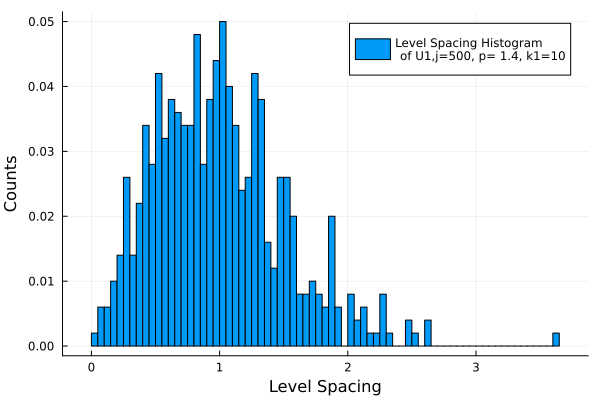

In [8]:
# Plot a histogram of the level spacing.
histogram(spacings_U1,bins=90,xlabel="Level Spacing",normalize=:probability,ylabel="Counts",label="Level Spacing Histogram\n of U1,j=$j1, p= $(round(p,digits = 3)), k1=$k1")


2) ## Level spacing for two coupled kicked top

$H = H_1 + H_2 + H_{12}$

$H_1=\alpha J_{y_1} +\frac{k_1}{2J_1}J_{z_1}^2\sum_{n=-\infty}^{\infty}\delta(t-n\tau)$

$H_{12}=\frac{\Delta_{12}}{2 \sqrt{j_1 j_2}}J_{z_1}J_{z_2}\sum_{n=-\infty}^{\infty}\delta(t-n\tau)$

In [9]:
using LinearAlgebra
using SparseArrays
using QuantumOptics
using Statistics
using FastExpm
import PyPlot as plt
using Plots
#using NPZ

In [10]:
#------------------------------------------------
# Parameters
k1 = 1;
k2 = 1;
j1 = 60
j2 = 40
p = 1.73
ϵpow= 14; ϵ = 10.0^(-ϵpow) #precision
Δ12 = 20; # coupling strength.
N1 = convert(Int64,2*j1+1) # N1 is the dimension of the 1st hilbert space (2j1 +1).
N2 = convert(Int64,2*j2+1) # N2 is the dimension of the 2nd hilbert space (2j2 +1).
#------------------------------------------------


# Basis
b1 = SpinBasis(j1)
b2 = SpinBasis(j2)

# Operator creation make a sparse matrix.
Jy1 = 0.5*sparse(sigmay(b1).data)
Jz1 = 0.5*sparse(sigmaz(b1).data)

Jy2 = 0.5*sparse(sigmay(b2).data)
Jz2 = 0.5*sparse(sigmaz(b2).data)

81×81 SparseMatrixCSC{ComplexF64, Int64} with 80 stored entries:
⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄

- Fkoquet operators for the time evolution.

$U_{1} = exp(-i\frac{k}{2J_1}J_{1y}^2)\cdot exp(-i\alpha J_{1z})$

$U_{12} = exp({-i\frac{\delta}{2\sqrt{J_1*J_2}}J_{1y}J_{2y}})$

$U=U_{12}(U_1\otimes U_2)$

In [11]:
# Floquet operators
# U1 for j=j1
U1 = fastExpm(-1im*k1*Jz1*Jz1/(2*j1),nonzero_tol=ϵ)*fastExpm(-1im*p*Jy1,nonzero_tol = ϵ);
#U2 = sparse(U1)

# U2 for j=j2
U2 = fastExpm(-1im*k2*Jz2*Jz2/(2*j2) ,nonzero_tol=ϵ)*fastExpm(-1im*p*Jy2 ,nonzero_tol = ϵ);
#U2 = sparse(U2)

# U12 Floquet for coupling term
U12 = fastExpm(-1im * Δ12* (kron(Jz1,Jz2)) / (2 * sqrt(j1 * j2) ),nonzero_tol = ϵ);

# Unitary evolution Floquet operator
U = U12 * kron(U1,U2)

9801×9801 Matrix{ComplexF64}:
 -1.33037e-31-6.52487e-32im  …   1.74181e-24+8.5428e-25im
 -6.57284e-31-1.37387e-30im     -6.38216e-24-1.33401e-23im
  2.17775e-30-1.08916e-29im     -1.55304e-23+7.76723e-23im
  4.85707e-29-4.56924e-29im      2.50712e-22-2.35855e-22im
  3.38617e-28-5.50956e-29im     -1.27039e-21+2.06701e-22im
  1.44113e-27+6.21712e-28im  …   3.92675e-21+1.69402e-21im
  3.78275e-27+5.29939e-27im     -7.48648e-21-1.04881e-20im
  2.51336e-27+2.47125e-26im      3.61285e-21+3.55232e-20im
 -3.36545e-26+8.13586e-26im      3.51373e-20-8.49433e-20im
 -2.21596e-25+1.90466e-25im     -1.68041e-19+1.44435e-19im
  -8.8135e-25+2.40524e-25im  …   4.85437e-19-1.32478e-19im
 -2.67293e-24-4.09885e-25im     -1.06931e-18-1.63974e-19im
 -6.50339e-24-3.94924e-24im      1.88966e-18+1.14751e-18im
             ⋮               ⋱              ⋮
  1.06931e-18+1.63974e-19im      7.76829e-24+1.19124e-24im
  4.85437e-19-1.32478e-19im  …  -2.56145e-24+6.99031e-25im
  1.68041e-19-1.44435e-19im      6.44019

In [12]:
# Dividing two suspace (evan-odd)
#------------------------------------------------
Λ1 = Matrix{Float64}(I, N1, N1) # N×N identity matrix.
for i = 1:2:j1
    Λ1[:,i],Λ1[:,N1-i+1] = normalize(Λ1[:,i] + Λ1[:,N1-i+1]),normalize(Λ1[:,i] - Λ1[:,N1-i+1])
    Λ1[:,i+1],Λ1[:,N1-i] = normalize(Λ1[:,i+1] - Λ1[:,N1-i]),normalize(Λ1[:,i+1] + Λ1[:,N1-i])
end

# to get the even-odd block in 1st Hilbert space.
# even block mesns Block of U1 in the space Ry has +1 eigenvaue.
if iseven(j1)
    Λ1_even = Λ1[:,1:(j1+1)]
    Λ1_odd = Λ1[:,(j1+2):N1]
elseif isodd(j1)
    Λ1_even = Λ1[:,1:j1]
    Λ1_odd = Λ1[:,(j1+1):N1]
else
    println("j1 = $j1, there is a problem in the value of j1")
end

Λ1_even = sparse(Λ1_even)
Λ1_odd = sparse(Λ1_odd)

Λ2 = Matrix{Float64}(I, N2, N2) # N×N identity matrix.
for i = 1:2:j2
    Λ2[:,i],Λ2[:,N2-i+1] = normalize(Λ2[:,i] + Λ2[:,N2-i+1]),normalize(Λ2[:,i] - Λ2[:,N2-i+1])
    Λ2[:,i+1],Λ2[:,N2-i] = normalize(Λ2[:,i+1] - Λ2[:,N2-i]),normalize(Λ2[:,i+1] + Λ2[:,N2-i])
end

# to get the even-odd block  in 1st Hilbert space..
# even block mesns Block of U1 in the space Ry has +1 eigenvaue.
if iseven(j2)
    Λ2_even = Λ2[:,1:(j2+1)]
    Λ2_odd = Λ2[:,(j2+2):N2]
elseif isodd(j2)
    Λ2_even = Λ2[:,1:j2]
    Λ2_odd = Λ2[:,(j2+1):N2]
else
    println("j2 = $j2, there is a problem in the value of j2")
end


Λ_pp = kron(Λ1_even,Λ2_even) # Λ_++
Λ_mm = kron(Λ1_odd,Λ2_odd) # Λ_--
pp_vects = size(Λ_pp)[2] # number of vector in Λ_++
mm_vects =  size(Λ_mm)[2] # number of vector in Λ_--
Λ_even = Array{Float64, 2}(undef, N1*N2,pp_vects + mm_vects )
Λ_even[:,1:pp_vects] = Λ_pp
Λ_even[:,(pp_vects+1):pp_vects + mm_vects] = Λ_mm

# Now, Λ_even is a transformation matrix which give even only subspace.
U_eblok = Λ_even' * U * Λ_even # even block of floquet matrix U1.
#------------------------------------------------

4901×4901 Matrix{ComplexF64}:
  1.74264e-24+4.73825e-25im  …  -1.01392e-25+3.729e-25im
 -4.34486e-24-1.32077e-23im     -1.89257e-24+6.2259e-25im
 -4.06862e-23+5.41146e-23im      2.88101e-23+2.1661e-23im
    2.351e-22+2.67786e-24im      2.85998e-24-2.51088e-22im
 -3.43266e-22-4.54455e-22im     -9.55507e-22+7.21728e-22im
 -1.60284e-22+6.53299e-22im  …    4.3088e-21+1.05714e-21im
 -1.65357e-21+8.35185e-22im     -6.04065e-21-1.19598e-20im
  1.43261e-20+5.55321e-21im     -1.20972e-20+3.12083e-20im
 -2.34518e-20-5.72971e-20im      6.29843e-20-2.57796e-20im
 -7.30577e-20+1.7328e-19im      -9.57077e-20-4.03518e-20im
    4.332e-19-1.8792e-19im   …   2.99946e-20+6.91448e-20im
 -9.55733e-19-3.25446e-19im     -6.42527e-20+1.8869e-19im
  9.32639e-19+1.59142e-18im      9.52983e-19-5.58487e-19im
             ⋮               ⋱              ⋮
 -5.78918e-20+1.7001e-19im      -1.06074e-18-3.61204e-19im
   2.7034e-20+6.23198e-20im  …   4.80642e-19-2.085e-19im
 -8.62404e-20-3.63603e-20im     -8.10777e-20+1

In [13]:
@time begin
#------------------------------------------------------
# finding the eigendecomposition of U1 in even subspace
eigv_U = eigvals(U_eblok);# eigenvalues of U1, in even parity subspace.
#------------------------------------------------------
end

@time begin
eigv_angles_U = angle.(eigv_U)# find angels in of the eigenvalues that got from last step.
sorted_eigv_angles_U = sort(eigv_angles_U)# sort the angles in ascending order.
end


# calculate the level spacing by taking the difference between adjacent angles.
spacings_U = 1diff(sorted_eigv_angles_U);
spacings_U = (1/mean(spacings_U))*spacings_U; # normalizing the level spacing.

 73.816130 seconds (18 allocations: 369.244 MiB)
  0.000235 seconds (6 allocations: 76.750 KiB)


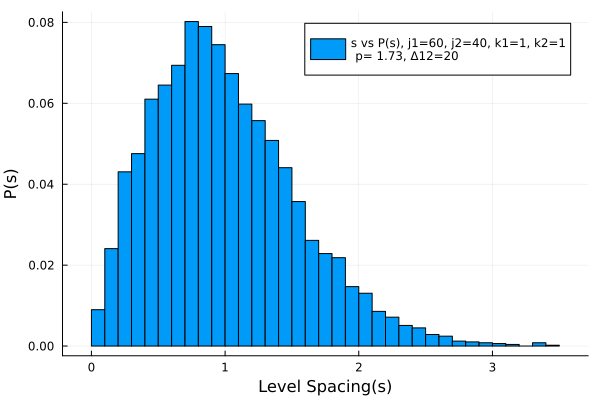

In [14]:
# Plot a histogram of the level spacing.
histogram(spacings_U,bins=50,xlabel="Level Spacing(s)",normalize=:probability,ylabel="P(s)",label="s vs P(s), j1=$j1, j2=$j2, k1=$k1, k2=$k2\n p= $(round(p,digits = 3)), Δ12=$Δ12 ")
#savefig("plots/ Levelspacingcccw2.png")#ccc → chaotic(k1) chaotic(k2) chaotic(Δ12) W⇒ Weigner

3) ## Level spacing for three coupled kicked top

$H = H_1 + H_2 + H_3 + H_{12}+ H_{23}$

$H_1=\alpha J_{y_1} +\frac{k_1}{2J_1}J_{z_1}^2\sum_{n=-\infty}^{\infty}\delta(t-n\tau)$

Where $\large{\alpha = \frac{\hslash p}{\tau}}$ from Haake paper on Kicked top.

$H_{ij}=\frac{\Delta_{ij}}{2\sqrt{J_i J_j}}J_{zi}J_{zj}\sum_{n=-\infty}^{\infty}\delta(t-n\tau)$

$U_{1} = exp(-i\frac{k}{2J_1}J_{z1}^2)\cdot exp(-i\alpha J_{y1})$

$U_{12} = exp({-i\frac{\Delta}{2\sqrt{J_1 J_2}}(J_{z1}\otimes J_{z2}}))$

$U=(U_{12}\otimes I_3)(I_1\otimes U_{23})(U_1\otimes U_2 \otimes U_3)$

Related papers:

[Entanglement in coupled kicked tops with chaotic dynamics](https://arxiv.org/pdf/1910.13447.pdf)

[Signatures of chaos in the entanglement of two coupled quantum kicked tops](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.60.1542)

In [15]:
using QuantumOptics
using SparseArrays
using LinearAlgebra
using Statistics
using FastExpm
using Plots

In [16]:
#------------------------------------------------
# Parameters
k1 = 5;
k2 = 10;
k3 = 6;
j1 = 8
j2 = 10
j3 = 9
p = 1.4
ϵpow= 14; ϵ = 10.0^(-ϵpow) #precision
Δ12 = 0.001; Δ23 = 0.001 # coupling strength.
N1 = convert(Int64,2*j1+1) # N1 is the dimension of the 1st hilbert space (2j1 +1).
N2 = convert(Int64,2*j2+1) # N2 is the dimension of the 2nd hilbert space (2j2 +1).
N3 = convert(Int64,2*j3+1) # N3 is the dimension of the 3rd hilbert space (2j3 +1)
#------------------------------------------------

# Basis
b1 = SpinBasis(j1)
b2 = SpinBasis(j2)
b3 = SpinBasis(j3)

# Operator creation
Jy1 = 0.5*sparse(sigmay(b1).data)
Jz1 = 0.5*sparse(sigmaz(b1).data)

Jy2 = 0.5*sparse(sigmay(b2).data)
Jz2 = 0.5*sparse(sigmaz(b2).data)

Jy3 = 0.5*sparse(sigmay(b3).data)
Jz3 = 0.5*sparse(sigmaz(b3).data)

19×19 SparseMatrixCSC{ComplexF64, Int64} with 18 stored entries:
⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠁⢄⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠑⠄

In [17]:
# Floquet operators
# U1 for j=j1
U1 = fastExpm(-1im*k1*Jz1*Jz1/(2*j1), threshold=1e-15,nonzero_tol=ϵ)*fastExpm(-1im*p*Jy1,threshold=1e-15,nonzero_tol = ϵ);
# U2 for j=j2
U2 = fastExpm(-1im*k2*Jz2*Jz2/(2*j2),threshold=1e-15 ,nonzero_tol=ϵ)*fastExpm(-1im*p*Jy2,threshold=1e-15 ,nonzero_tol = ϵ);
# U3 for j=j3
U3 = fastExpm(-1im*k3*Jz3*Jz3/(2*(j3+1/2)),threshold=1e-15,nonzero_tol=ϵ) * fastExpm(-1im*p*Jy3,threshold=1e-15,nonzero_tol = ϵ);

# U12 Floquet for coupling term
U12 = fastExpm(-1im * Δ12* (kron(Jz1,Jz2)) / (2 * sqrt(j1 * j2) ),threshold=1e-15,nonzero_tol = ϵ);
# U23 Floquet for coupling term
U23 = fastExpm(-1im * Δ23*kron(Jz2,Jz3) / (2 * sqrt(j2 * j3)),threshold=1e-15 ,nonzero_tol = ϵ);

# U12 an U23 ∈ H1⊗H2⊗ H3
U12 = kron(U12,Matrix{ComplexF64}(I,N3,N3));
U23 = kron(Matrix{ComplexF64}(I,N1,N1),U23)

# Unitary floquet operator of whole system
U = U12*U23*kron(U1,U2,U3)
#U_off23 = U12*U23*kron(U1,U2,U3)

6783×6783 Matrix{ComplexF64}:
   1.17906e-7-5.02629e-7im   …   1.11281e-11-4.74385e-11im
  -1.16555e-6-1.43011e-6im       1.55057e-10+1.90253e-10im
  -3.58227e-6+2.77359e-6im      -6.71736e-10+5.20095e-10im
   8.40498e-6+2.64935e-6im       -2.22155e-9-7.00258e-10im
  -1.15469e-5-8.5608e-6im        -4.30191e-9-3.18942e-9im
   1.91061e-5+6.73731e-6im   …   -1.00334e-8-3.53804e-9im
  -2.08499e-5+1.40064e-5im       -1.54333e-8+1.03676e-8im
  -1.52463e-5-2.31268e-5im        1.59073e-8+2.41295e-8im
   9.76682e-6-2.55559e-5im        1.43636e-8-3.75839e-8im
   1.52993e-5-1.88667e-5im       -3.17148e-8+3.91097e-8im
   6.94817e-6-1.81233e-5im   …     2.0302e-8-5.29548e-8im
   -7.6492e-6-1.16563e-5im        3.15037e-8+4.80072e-8im
  -7.46086e-6+4.97782e-6im       -4.33125e-8+2.88977e-8im
             ⋮               ⋱  
  -3.15037e-8-4.80072e-8im         7.6492e-6+1.16563e-5im
    2.0302e-8-5.29548e-8im        6.94817e-6-1.81233e-5im
   3.17148e-8-3.91097e-8im       -1.52993e-5+1.88667e-5im
   1.

In [18]:
# function to seperate the even and odd space of Ry(parity)
function pstate_even_odd(j) # pstate → parity eigenststes
    N = convert(Int64,2*j+1)
    Λ = Matrix{Float64}(I, N, N) # N×N identity matrix.
    for i = 1:2:j
        Λ[:,i],Λ[:,N-i+1] = normalize(Λ[:,i] + Λ[:,N-i+1]),normalize(Λ[:,i] - Λ[:,N-i+1])
        Λ[:,i+1],Λ[:,N-i] = normalize(Λ[:,i+1] - Λ[:,N-i]),normalize(Λ[:,i+1] + Λ[:,N-i])
    end
    
    # to get the even-odd block  in the Hilbert space..
    if iseven(j)
        Λ_even = Λ[:,1:(j+1)]
        Λ_odd = Λ[:,(j+2):N]
    elseif isodd(j)
        Λ_even = Λ[:,1:j]
        Λ_odd = Λ[:,(j+1):N]
    end
    return Λ_even,Λ_odd
end

pstate_even_odd (generic function with 1 method)

In [19]:
# Dividing two suspace (evan-odd)
#------------------------------------------------
Λ1_even, Λ1_odd = pstate_even_odd(j1)
Λ2_even, Λ2_odd = pstate_even_odd(j2)
Λ3_even, Λ3_odd = pstate_even_odd(j3)

Λ_ppp = kron(Λ1_even,Λ2_even,Λ3_even) # Λ_++
Λ_mmp = kron(Λ1_odd,Λ2_odd,Λ3_even) # Λ_--+
Λ_mpm = kron(Λ1_odd,Λ2_even,Λ3_odd) # Λ_-+-
Λ_pmm = kron(Λ1_even,Λ2_odd,Λ3_odd) # Λ_+--

ppp_vects = size(Λ_ppp)[2] # number of vector in Λ_+++
mmp_vects = size(Λ_mmp)[2] # number of vector in Λ_--+
mpm_vects = size(Λ_mpm)[2] # number of vector in Λ_-+-
pmm_vects = size(Λ_pmm)[2] # number of vector in Λ_+--

Λ_even = Array{Float64, 2}(undef, N1*N2*N3,ppp_vects + mmp_vects + mpm_vects + pmm_vects)
Λ_even[:,1:ppp_vects] = Λ_ppp
Λ_even[:,(ppp_vects+1):ppp_vects + mmp_vects] = Λ_mmp
Λ_even[:,(ppp_vects + mmp_vects + 1): ppp_vects + mmp_vects + mpm_vects] = Λ_mpm
Λ_even[:,(ppp_vects + mmp_vects + mpm_vects + 1): ppp_vects + mmp_vects + mpm_vects + pmm_vects] = Λ_pmm

# Now, Λ_even is a transformation matrix which give even only subspace.
U_eblok = Λ_even' * U * Λ_even # even block of floquet matrix U1.
#------------------------------------------------

3391×3391 Matrix{ComplexF64}:
  1.40734e-7-5.76018e-7im   …  -8.93033e-8-2.18189e-8im
  -1.1854e-6-1.48055e-6im      -2.54153e-7+2.03487e-7im
 -4.31819e-6+3.28736e-6im       3.62176e-7+4.75745e-7im
  8.03626e-6+2.60074e-6im       3.80509e-7-1.17577e-6im
 -1.48851e-5-1.12006e-5im       -7.3477e-7+9.76478e-7im
   1.5635e-5+5.62925e-6im   …   7.13194e-7-1.98087e-6im
  -3.1209e-5+2.06922e-5im       5.54933e-7+8.36976e-7im
 -8.24888e-6-1.26643e-5im      -1.44659e-6+9.42234e-7im
  1.85808e-5-4.7899e-5im       -1.53621e-7-5.95921e-8im
 -6.39536e-7+1.96367e-6im       3.20171e-7+1.04275e-7im
  3.72936e-6+5.4522e-6im    …   9.84295e-7-6.73268e-7im
  1.58574e-5-1.02867e-5im      -1.19188e-6-1.83734e-6im
 -2.72291e-5-1.11357e-5im      -1.71344e-6+4.18971e-6im
            ⋮               ⋱             ⋮
  8.15915e-7+5.00838e-7im      -9.44452e-6+1.53861e-5im
  3.54593e-8+3.34854e-7im   …  -4.50601e-6+4.77163e-7im
 3.82878e-20+1.33752e-20im      7.48971e-5+2.03646e-5im
 -5.20046e-8-1.03287e-6im     

In [20]:
@time begin
#------------------------------------------------------
# finding the eigendecomposition of U1 in even subspace
eigv_U = eigvals(U_eblok);# eigenvalues of U1, in even parity subspace.
#------------------------------------------------------
end

@time begin
eigv_angles_U = angle.(eigv_U)# find angels in of the eigenvalues that got from last step.
sorted_eigv_angles_U = sort(eigv_angles_U)# sort the angles in ascending order.
end


# calculate the level spacing by taking the difference between adjacent angles.
spacings_U = 1diff(sorted_eigv_angles_U);
spacings_U = (1/mean(spacings_U))*spacings_U; # normalizing the level spacing.

 28.687101 seconds (18 allocations: 177.348 MiB, 0.20% gc time)
  0.000171 seconds (6 allocations: 53.125 KiB)


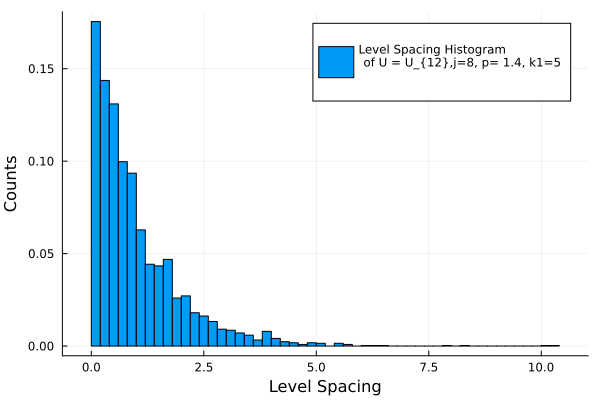

In [21]:
# Plot a histogram of the level spacing.
histogram(spacings_U,bins=70,xlabel="Level Spacing",normalize=:probability,ylabel="Counts",label="Level Spacing Histogram\n of U = U_{12},j=$j1, p= $(round(p,digits = 3)), k1=$k1 \n ")
